Import needed modules

In [1]:
from pymonntorch import *
from matplotlib import pyplot as plt
import numpy as np
from timeRes import TimeResolution
from current import *
from models import *
# from AELIF import AELIF

simulation networks

In [2]:
def network_simpulation(net, num_iterations):
    net.initialize()
    net.simulate_iterations(num_iterations)

    return net

plot networks behaviors

In [3]:
def plot_lif_behavior(net):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(net["v", 0])
    plt.axhline(y=-65, color='r', linestyle='dashdot', label='u-rest')  # u-rest
    plt.axhline(y=-75, color='g', linestyle='dashdot', label='u-resert')  # u-resert
    plt.axhline(y=-35, color='b', linestyle='dashdot', label='Threshold')  # threshold
    plt.ylabel("du/dt")
    plt.xlabel("time")
    plt.legend()
    plt.title("potential")

    # plt.figure(figsize=(4,3))
    plt.subplot(1, 3, 2)
    plt.plot(net["I", 0])
    plt.ylabel("I")
    plt.xlabel("time")
    plt.title("current")

    # plt.figure(figsize=(4,3))
    plt.subplot(1, 3, 3)
    plt.scatter(net["spike", 0][:,0], net["spike", 0][:,1])
    plt.ylabel("spike")
    plt.xlabel("time")
    plt.title("spikes")
    plt.show()

    return

In [4]:
def plot_elif_behavior(net):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(net["v", 0])
    plt.axhline(y=-65, color='r', linestyle='dashdot', label='u-rest')  # u-rest
    plt.axhline(y=-75, color='g', linestyle='dashdot', label='u-resert')  # u-resert
    plt.axhline(y=-35, color='b', linestyle='dashdot', label='Threshold')  # threshold
    plt.axhline(y=-40, color='y', linestyle='dashdot', label='Theta rh')  # Theta rh
    plt.ylabel("du/dt")
    plt.xlabel("time")
    plt.legend()
    plt.title("potential")

    # plt.figure(figsize=(4,3))
    plt.subplot(1, 3, 2)
    plt.plot(net["I", 0])
    plt.ylabel("I")
    plt.xlabel("time")
    plt.title("current")

    # plt.figure(figsize=(4,3))
    plt.subplot(1, 3, 3)
    plt.scatter(net["spike", 0][:,0], net["spike", 0][:,1])
    plt.ylabel("spike")
    plt.xlabel("time")
    plt.title("spikes")
    plt.show()

    return

In [11]:
def F_I_curve_plot(frequencies, range1, title):
    x = [i for i in range(range1) if i%4==0]
    plt.figure(figsize=(5, 3))
    plt.plot(x, frequencies)
    plt.ylabel("F")
    plt.xlabel("I")
    plt.title(f"{title} F-I curve")
    plt.show()

In [46]:
def lif_with_constant_current(i, tau=10, r=1):
    lif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    lif_ng1 = NeuronGroup(
        1,
        net=lif_net,
        behavior={
            2: ConstantCurrent(value=i),
            3: LIF(
                tau=tau,
                u_rest=-65,
                u_reset=-75,
                threshold=-35,
                R=r,
            ),
            4: Recorder(variables=["v", "I"], tag="lif_ng1_rec, lif_ng1_recorder"),
            5: EventRecorder("spike", tag="lif_ng1_evrec"),
        },
        tag="lif_ng1",
    )

    lif_net = network_simpulation(lif_net, 100)

    return lif_net

In [13]:
def lif_with_step_current(i, t0, tau=10, r=1):
    lif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    lif_ng1 = NeuronGroup(
        1,
        net=lif_net,
        behavior={
            2: StepCurrent(value=i, t0=t0),
            3: LIF(
                tau=tau,
                u_rest=-65,
                u_reset=-75,
                threshold=-35,
                R=r,
            ),
            4: Recorder(variables=["v", "I"], tag="lif_ng1_rec, lif_ng1_recorder"),
            5: EventRecorder("spike", tag="lif_ng1_evrec"),
        },
        tag="lif_ng1",
    )

    lif_net = network_simpulation(lif_net, 100)

    return lif_net

In [36]:
def lif_with_stair_current(i, t, tau=10, r=1):
    lif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    lif_ng1 = NeuronGroup(
        1,
        net=lif_net,
        behavior={
            2: StaircaseCurrent(value=i, t=t),
            3: LIF(
                tau=tau,
                u_rest=-65,
                u_reset=-75,
                threshold=-35,
                R=r,
            ),
            4: Recorder(variables=["v", "I"], tag="lif_ng1_rec, lif_ng1_recorder"),
            5: EventRecorder("spike", tag="lif_ng1_evrec"),
        },
        tag="lif_ng1",
    )

    lif_net = network_simpulation(lif_net, 100)

    return lif_net

In [5]:
def lif_with_sin_current(amplitude, frequency, tau=10, r=1):
    lif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    lif_ng1 = NeuronGroup(
        1,
        net=lif_net,
        behavior={
            2: SinCurrent(amplitude=amplitude, frequency=frequency),
            3: LIF(
                tau=tau,
                u_rest=-65,
                u_reset=-75,
                threshold=-35,
                R=r,
            ),
            4: Recorder(variables=["v", "I"], tag="lif_ng1_rec, lif_ng1_recorder"),
            5: EventRecorder("spike", tag="lif_ng1_evrec"),
        },
        tag="lif_ng1",
    )

    lif_net = network_simpulation(lif_net, 100)

    return lif_net

In [21]:
def lif_with_sinnoise_current(amplitude, frequency, tau=10, r=1):
    lif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    lif_ng1 = NeuronGroup(
        1,
        net=lif_net,
        behavior={
            2: NoisyCurrent(amplitude=amplitude, frequency=frequency),
            3: LIF(
                tau=tau,
                u_rest=-65,
                u_reset=-75,
                threshold=-35,
                R=r,
            ),
            4: Recorder(variables=["v", "I"], tag="lif_ng1_rec, lif_ng1_recorder"),
            5: EventRecorder("spike", tag="lif_ng1_evrec"),
        },
        tag="lif_ng1",
    )

    lif_net = network_simpulation(lif_net, 100)

    return lif_net

In [4]:
def lif_frequency_recorder(i, tau=10, r=1):
    lif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    lif_ng1 = NeuronGroup(
        1,
        net=lif_net,
        behavior={
            2: ConstantCurrent(value=i),
            3: LIF(
                tau=tau,
                u_rest=-65,
                u_reset=-75,
                threshold=-35,
                R=r,
            ),
            4: Recorder(variables=["num_spikes"], tag="lif_ng1_rec, lif_ng1_recorder"),
        },
        tag="lif_ng1",
    )

    lif_net = network_simpulation(lif_net, 100)

    return lif_net["num_spikes", 0][-1][0]

In [8]:
def elif_with_constant_current(i, tau=10, delta_t=5, r=1):
    elif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    elif_ng1 = NeuronGroup(
    1,
    net=elif_net,
    behavior={
        2: ConstantCurrent(value=i),
        3: ELIF(
            tau=tau,
            u_rest=-65,
            u_reset=-75,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
        ),
        4: Recorder(variables=["v", "I"], tag="elif_ng1_rec, elif_ng1_recorder"),
        5: EventRecorder("spike", tag="elif_ng1_evrec"),
    },
    tag="elif_ng1",
    )

    elif_net = network_simpulation(elif_net, 100)

    return elif_net

In [23]:
def elif_with_step_current(i, t0, tau=10, delta_t=5, r=1):
    elif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    elif_ng1 = NeuronGroup(
    1,
    net=elif_net,
    behavior={
        2: StepCurrent(value=i, t0=t0),
        3: ELIF(
            tau=tau,
            u_rest=-65,
            u_reset=-75,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
        ),
        4: Recorder(variables=["v", "I"], tag="elif_ng1_rec, elif_ng1_recorder"),
        5: EventRecorder("spike", tag="elif_ng1_evrec"),
    },
    tag="elif_ng1",
    )

    elif_net = network_simpulation(elif_net, 100)

    return elif_net

In [41]:
def elif_with_stair_current(i, t, tau=10, delta_t=5, r=1):
    elif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    elif_ng1 = NeuronGroup(
    1,
    net=elif_net,
    behavior={
        2: StaircaseCurrent(value=i, t=t),
        3: ELIF(
            tau=tau,
            u_rest=-65,
            u_reset=-75,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
        ),
        4: Recorder(variables=["v", "I"], tag="elif_ng1_rec, elif_ng1_recorder"),
        5: EventRecorder("spike", tag="elif_ng1_evrec"),
    },
    tag="elif_ng1",
    )

    elif_net = network_simpulation(elif_net, 100)

    return elif_net

In [14]:
def elif_with_sin_current(amplitude, frequency, tau=10, delta_t=5, r=1):
    elif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    elif_ng1 = NeuronGroup(
    1,
    net=elif_net,
    behavior={
        2: SinCurrent(amplitude=amplitude, frequency=frequency),
        3: ELIF(
            tau=tau,
            u_rest=-65,
            u_reset=-75,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
        ),
        4: Recorder(variables=["v", "I"], tag="elif_ng1_rec, elif_ng1_recorder"),
        5: EventRecorder("spike", tag="elif_ng1_evrec"),
    },
    tag="elif_ng1",
    )

    elif_net = network_simpulation(elif_net, 100)

    return elif_net

In [22]:
def elif_with_sinnoise_current(amplitude, frequency, tau=10, delta_t=5, r=1):
    elif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    elif_ng1 = NeuronGroup(
    1,
    net=elif_net,
    behavior={
        2: NoisyCurrent(amplitude=amplitude, frequency=frequency),
        3: ELIF(
            tau=tau,
            u_rest=-65,
            u_reset=-75,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
        ),
        4: Recorder(variables=["v", "I"], tag="elif_ng1_rec, elif_ng1_recorder"),
        5: EventRecorder("spike", tag="elif_ng1_evrec"),
    },
    tag="elif_ng1",
    )

    elif_net = network_simpulation(elif_net, 100)

    return elif_net

In [5]:
def elif_frequency_recorder(i, tau=10, delta_t=5, r=1):
    elif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    elif_ng1 = NeuronGroup(
    1,
    net=elif_net,
    behavior={
        2: ConstantCurrent(value=i),
        3: ELIF(
            tau=tau,
            u_rest=-65,
            u_reset=-75,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
        ),
        4: Recorder(variables=["num_spikes"], tag="elif_ng1_rec, elif_ng1_recorder"),
    },
    tag="elif_ng1",
    )

    elif_net = network_simpulation(elif_net, 100)

    return elif_net["num_spikes", 0][-1][0]

In [4]:
def aelif_with_constant_current(i, tau_m=10, tau_w=200, delta_t=5, r=1, alpha=1, beta=8):
    aelif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    aelif_ng1 = NeuronGroup(
    1,
    net=aelif_net,
    behavior={
        2: ConstantCurrent(value=i),
        3: AELIF(
            tau_m=tau_m,
            tau_w=tau_w,
            u_rest=-75,
            u_reset=-65,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
            alpha=alpha,
            beta=beta,
        ),
        4: Recorder(variables=["v", "I"], tag="aelif_ng1_rec, aelif_ng1_recorder"),
        5: EventRecorder("spike", tag="aelif_ng1_evrec"),
    },
    tag="AELIF_NG1",
    )

    aelif_net = network_simpulation(aelif_net, 100)

    return aelif_net

In [33]:
def aelif_with_step_current(i, t0, tau_m=10, tau_w=200, delta_t=5, r=1, alpha=1, beta=8):
    aelif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    aelif_ng1 = NeuronGroup(
    1,
    net=aelif_net,
    behavior={
        2: StepCurrent(value=i, t0=t0),
        3: AELIF(
            tau_m=tau_m,
            tau_w=tau_w,
            u_rest=-75,
            u_reset=-65,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
            alpha=alpha,
            beta=beta,
        ),
        4: Recorder(variables=["v", "I"], tag="aelif_ng1_rec, aelif_ng1_recorder"),
        5: EventRecorder("spike", tag="aelif_ng1_evrec"),
    },
    tag="AELIF_NG1",
    )

    aelif_net = network_simpulation(aelif_net, 100)

    return aelif_net

In [44]:
def aelif_with_stair_current(i, t, tau_m=10, tau_w=200, delta_t=5, r=1, alpha=1, beta=8):
    aelif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    aelif_ng1 = NeuronGroup(
    1,
    net=aelif_net,
    behavior={
        2: StaircaseCurrent(value=i, t=t),
        3: AELIF(
            tau_m=tau_m,
            tau_w=tau_w,
            u_rest=-75,
            u_reset=-65,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
            alpha=alpha,
            beta=beta,
        ),
        4: Recorder(variables=["v", "I"], tag="aelif_ng1_rec, aelif_ng1_recorder"),
        5: EventRecorder("spike", tag="aelif_ng1_evrec"),
    },
    tag="AELIF_NG1",
    )

    aelif_net = network_simpulation(aelif_net, 100)

    return aelif_net

In [13]:
def aelif_with_sin_current(amplitude, frequency, tau_m=10, tau_w=200, delta_t=5, r=1, alpha=1, beta=8):
    aelif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    aelif_ng1 = NeuronGroup(
    1,
    net=aelif_net,
    behavior={
        2: SinCurrent(amplitude=amplitude, frequency=frequency),
        3: AELIF(
            tau_m=tau_m,
            tau_w=tau_w,
            u_rest=-75,
            u_reset=-65,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
            alpha=alpha,
            beta=beta,
        ),
        4: Recorder(variables=["v", "I"], tag="aelif_ng1_rec, aelif_ng1_recorder"),
        5: EventRecorder("spike", tag="aelif_ng1_evrec"),
    },
    tag="AELIF_NG1",
    )

    aelif_net = network_simpulation(aelif_net, 100)

    return aelif_net

In [23]:
def aelif_with_sinnoise_current(amplitude, frequency, tau_m=10, tau_w=200, delta_t=5, r=1, alpha=1, beta=8):
    aelif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    aelif_ng1 = NeuronGroup(
    1,
    net=aelif_net,
    behavior={
        2: NoisyCurrent(amplitude=amplitude, frequency=frequency),
        3: AELIF(
            tau_m=tau_m,
            tau_w=tau_w,
            u_rest=-75,
            u_reset=-65,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
            alpha=alpha,
            beta=beta,
        ),
        4: Recorder(variables=["v", "I"], tag="aelif_ng1_rec, aelif_ng1_recorder"),
        5: EventRecorder("spike", tag="aelif_ng1_evrec"),
    },
    tag="AELIF_NG1",
    )

    aelif_net = network_simpulation(aelif_net, 100)

    return aelif_net

In [6]:
def aelif_frequency_recorder(i, tau_m=10, tau_w=200, delta_t=5, r=1, alpha=1, beta=8):
    aelif_net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
    aelif_ng1 = NeuronGroup(
    1,
    net=aelif_net,
    behavior={
        2: ConstantCurrent(value=i),
        3: AELIF(
            tau_m=tau_m,
            tau_w=tau_w,
            u_rest=-75,
            u_reset=-65,
            theta_rh=-40,
            threshold=-35,
            delta_t=delta_t,
            R=r,
            alpha=alpha,
            beta=beta,
        ),
        4: Recorder(variables=["num_spikes"], tag="aelif_ng1_rec, aelif_ng1_recorder"),
    },
    tag="AELIF_NG1",
    )

    aelif_net = network_simpulation(aelif_net, 100)

    return aelif_net["num_spikes", 0][-1][0]

### LIF model

$$\tau\frac{du}{dt}= -(u-u_{rest})+R.I(t)$$

### ELIF model

$$\tau\frac{du}{dt}= -(u-u_{rest})+\Delta_{t} exp(\frac{u-\theta_{rh}}{\Delta_{t}})+R.I(t)$$

### AELIF model

$$\tau_{m}\frac{du}{dt}= -(u-u_{rest})+\Delta_{t} exp(\frac{u-\theta_{rh}}{\Delta_{t}})-Rw+R.I(t)$$
$$\tau_{w}\frac{dw}{dt}= a(u-u_{rest})-w+b\tau_{w}\sum_{t^{f}}^{}\delta(t-t^{f})$$

Analyzing models functionalities with different currents as stimuli

constant current

LIF

LIF with constant current 
I = 15

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=15,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 88.395ms


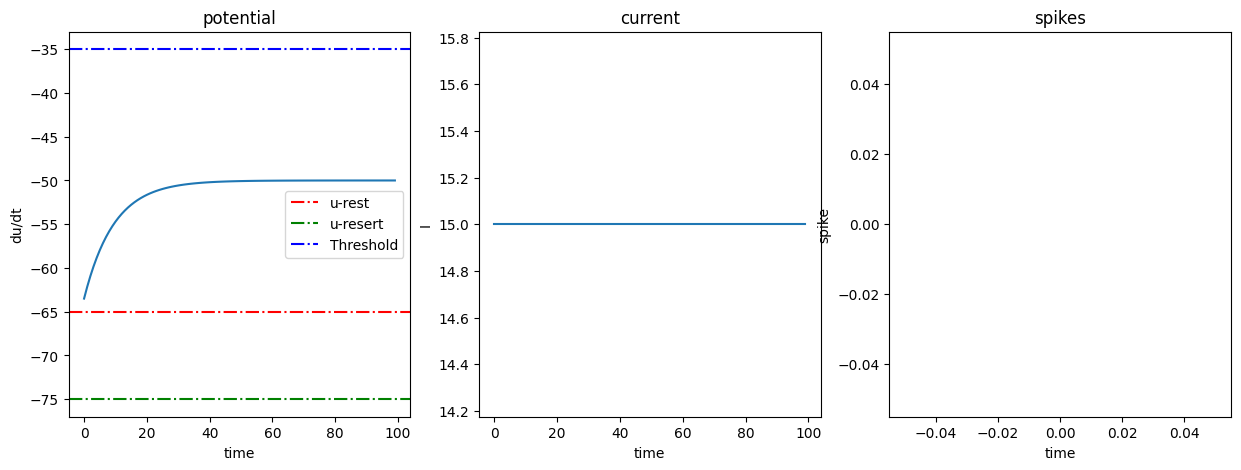

In [60]:
lif_net = lif_with_constant_current(i=15)
plot_lif_behavior(lif_net)

LIF with constant current 
I = 35

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=35,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 69.495ms


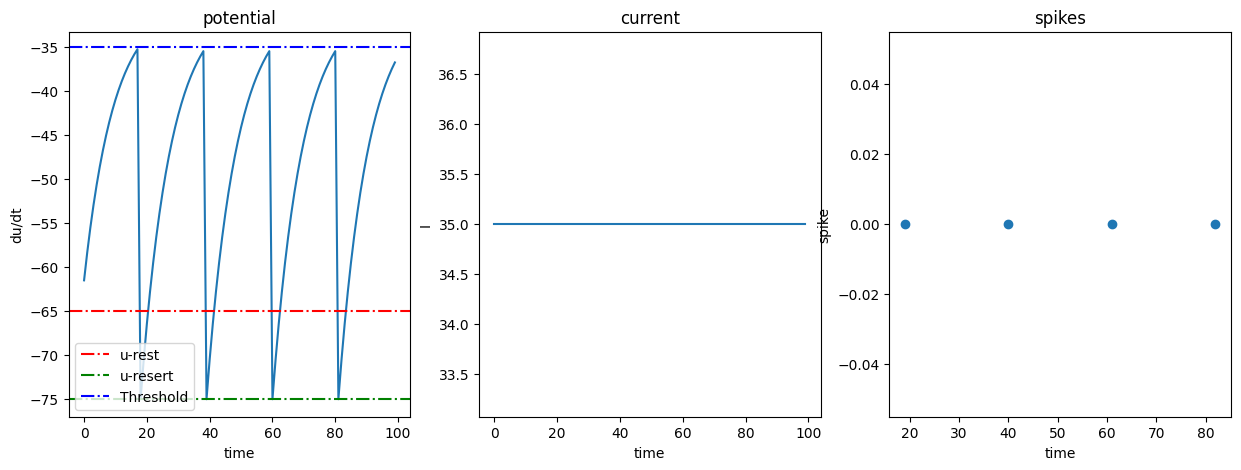

In [61]:
lif_net = lif_with_constant_current(i=35)
plot_lif_behavior(lif_net)

LIF with constant current 
I = 70

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=70,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 101.935ms


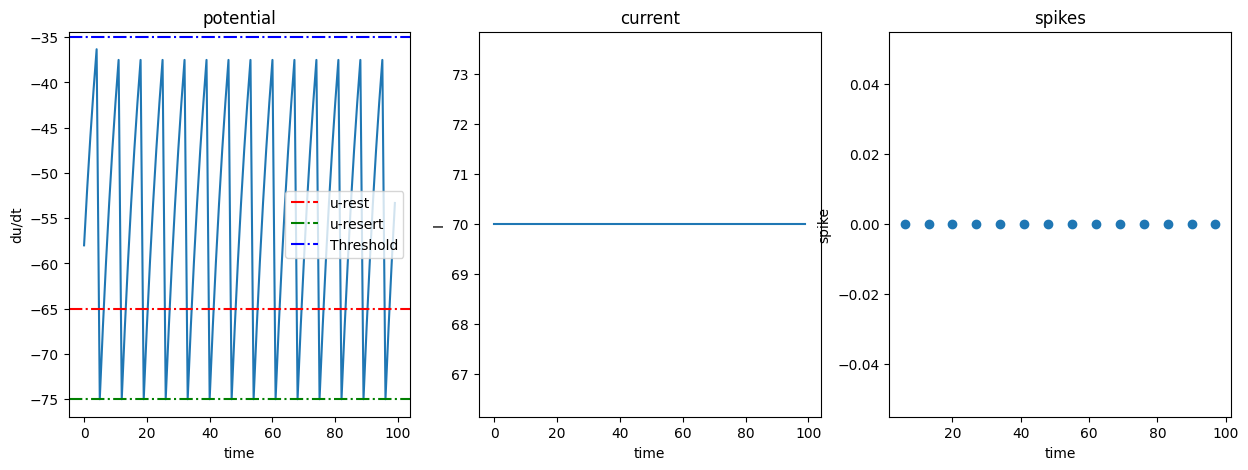

In [62]:
lif_net = lif_with_constant_current(i=70)
plot_lif_behavior(lif_net)

LIF with constant current 
I = 100

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=100,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 83.045ms


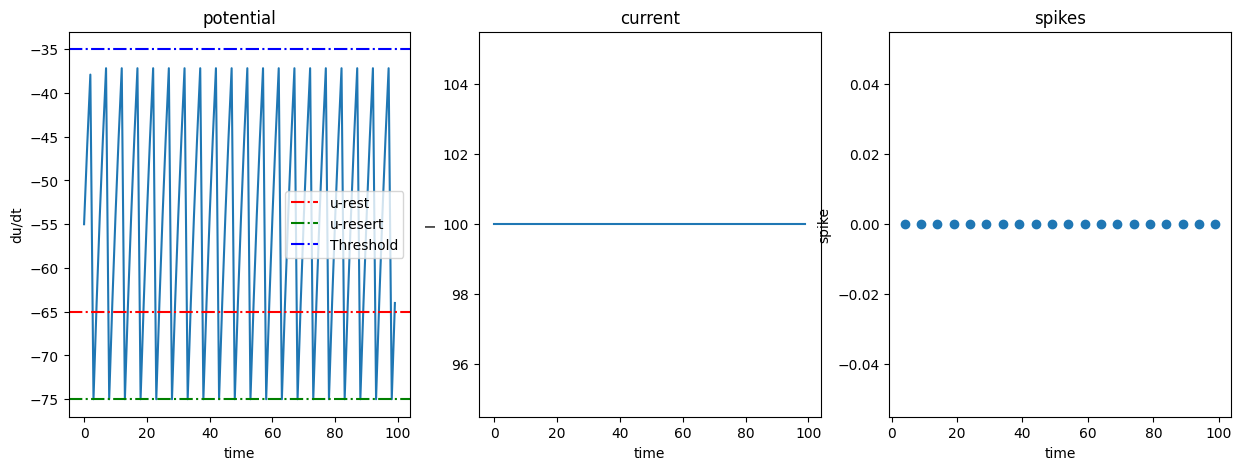

In [63]:
lif_net = lif_with_constant_current(i=100)
plot_lif_behavior(lif_net)

ELIF

ELIF with constant I=15

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=15,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 118.520ms


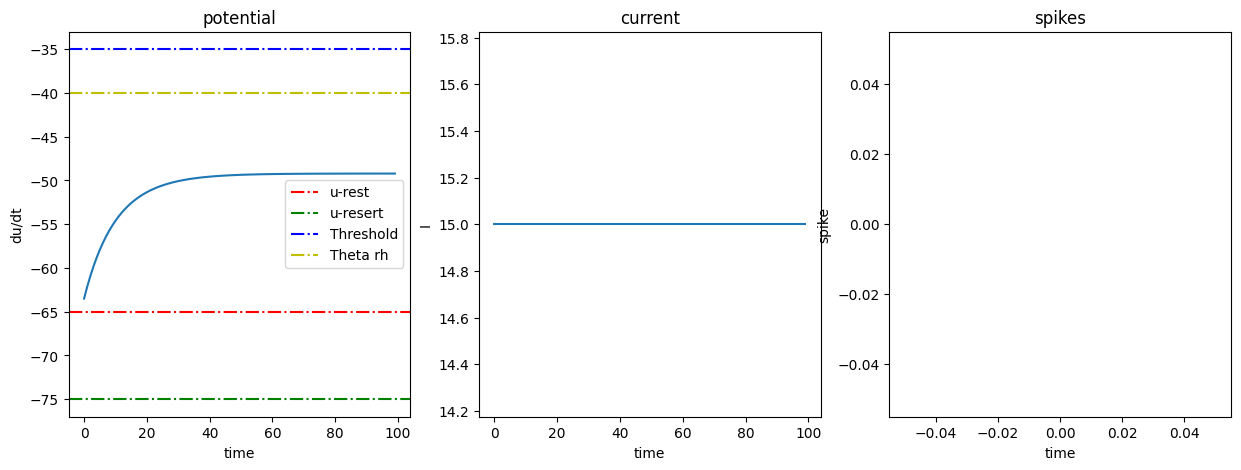

In [9]:
elif_net = elif_with_constant_current(i=15)
plot_elif_behavior(elif_net)

ELIF with constant I=35

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=35,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 102.371ms


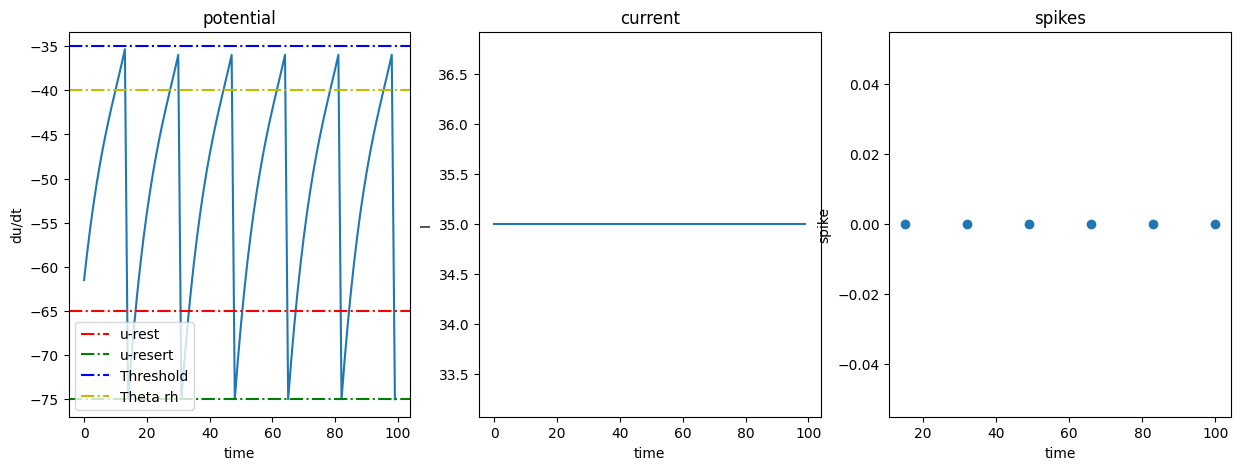

In [10]:
elif_net = elif_with_constant_current(i=35)
plot_elif_behavior(elif_net)

ELIF with constant I=70

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=70,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 95.321ms


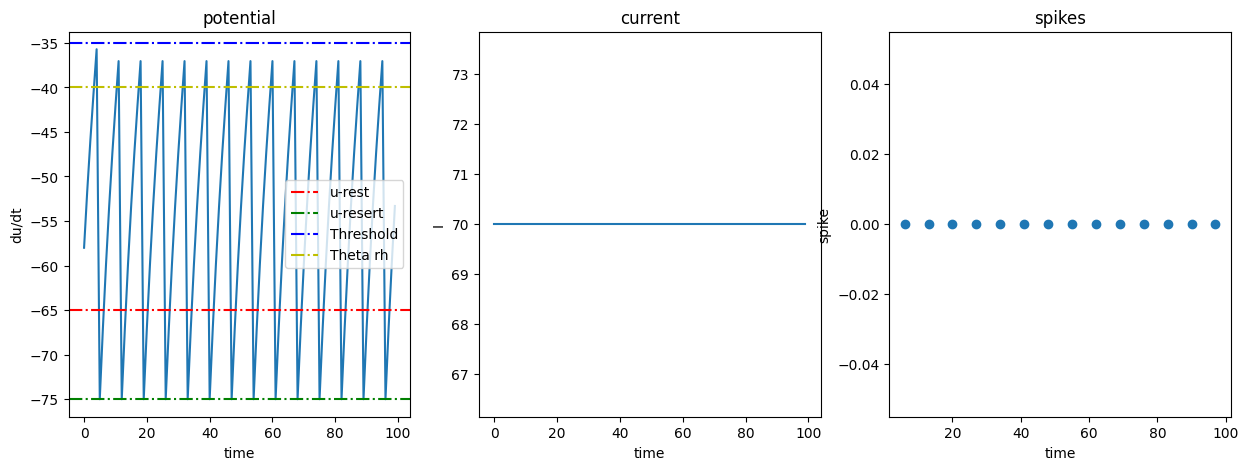

In [11]:
elif_net = elif_with_constant_current(i=70)
plot_elif_behavior(elif_net)

ELIF with constant I=100

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=100,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 58.413ms


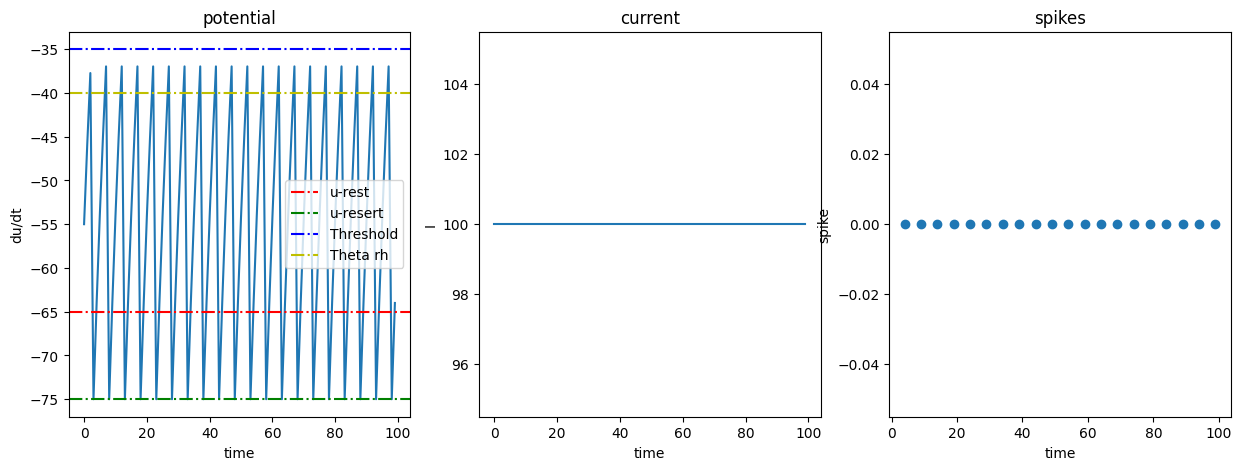

In [12]:
elif_net = elif_with_constant_current(i=100)
plot_elif_behavior(elif_net)

AELIF

AELIF with constant I=15

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=15,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=2,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 241.518ms


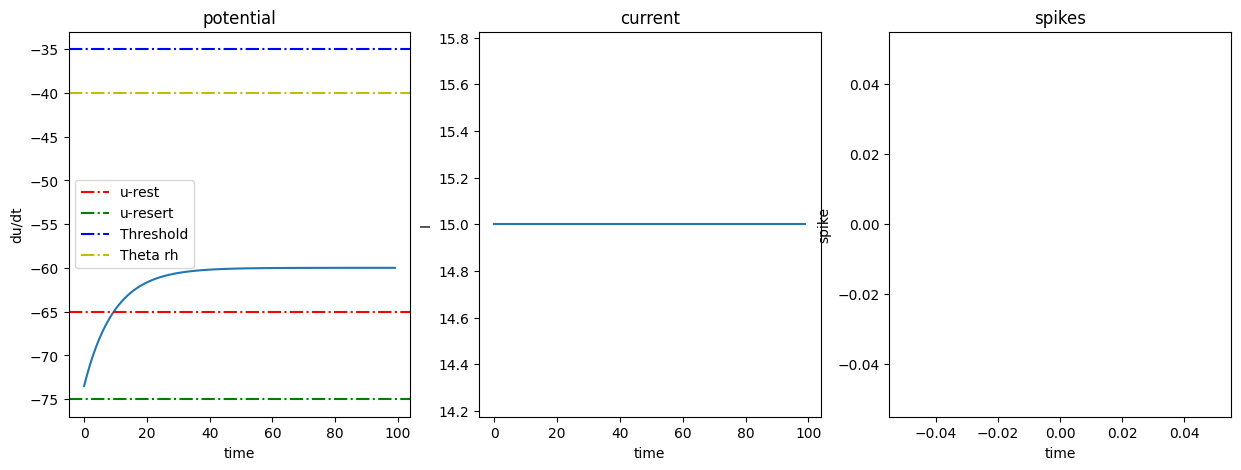

In [5]:
aelif_net = aelif_with_constant_current(i=15)
plot_elif_behavior(aelif_net)

AELIF with constant I=35

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=35,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=2,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 216.083ms


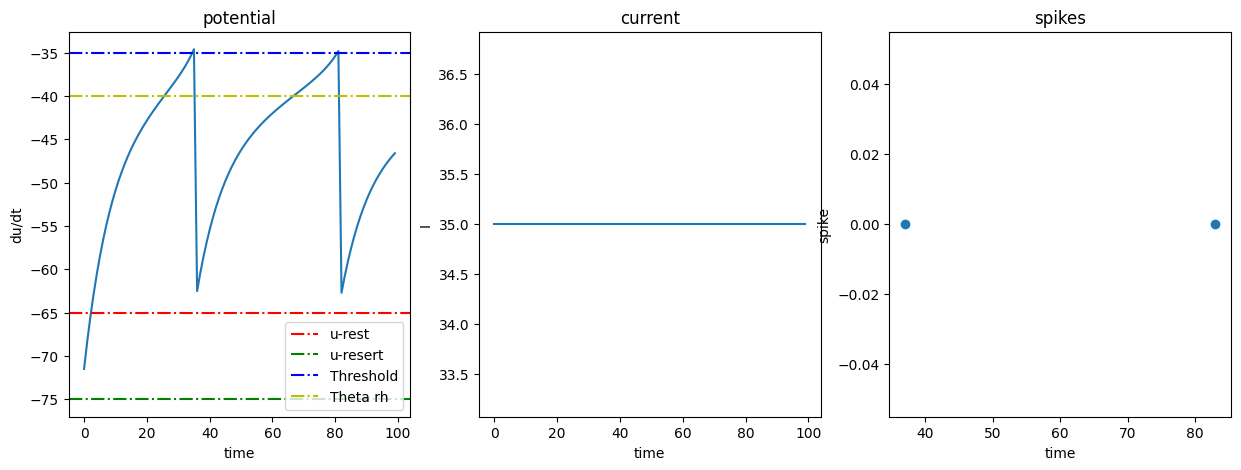

In [6]:
aelif_net = aelif_with_constant_current(i=35)
plot_elif_behavior(aelif_net)

AELIF with constant I=70

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=70,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}


100xBatch: 1/1 (100%) 221.185ms


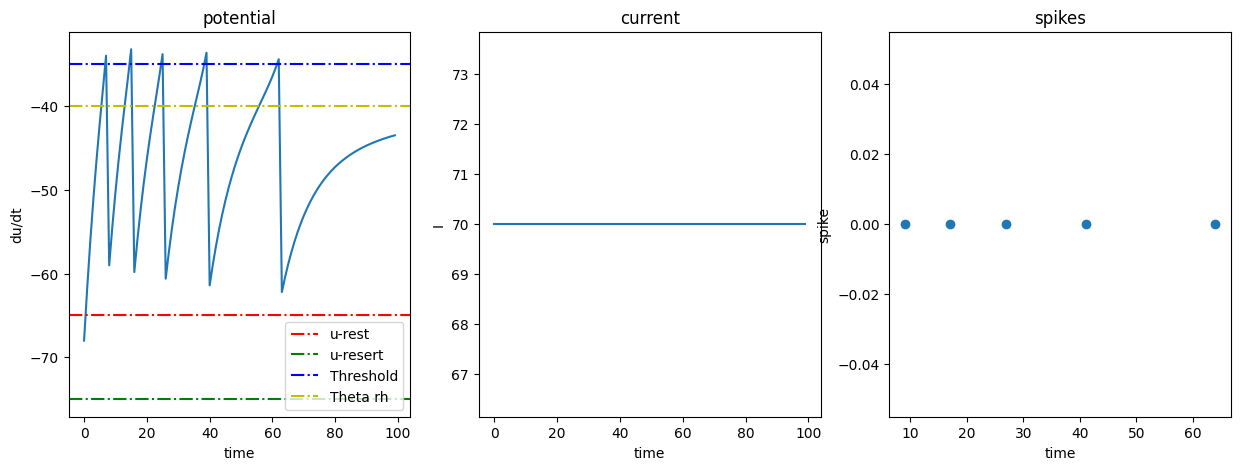

In [10]:
aelif_net = aelif_with_constant_current(i=70, beta=8)
plot_elif_behavior(aelif_net)

AELIF with constant I=100

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=100,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 200.169ms


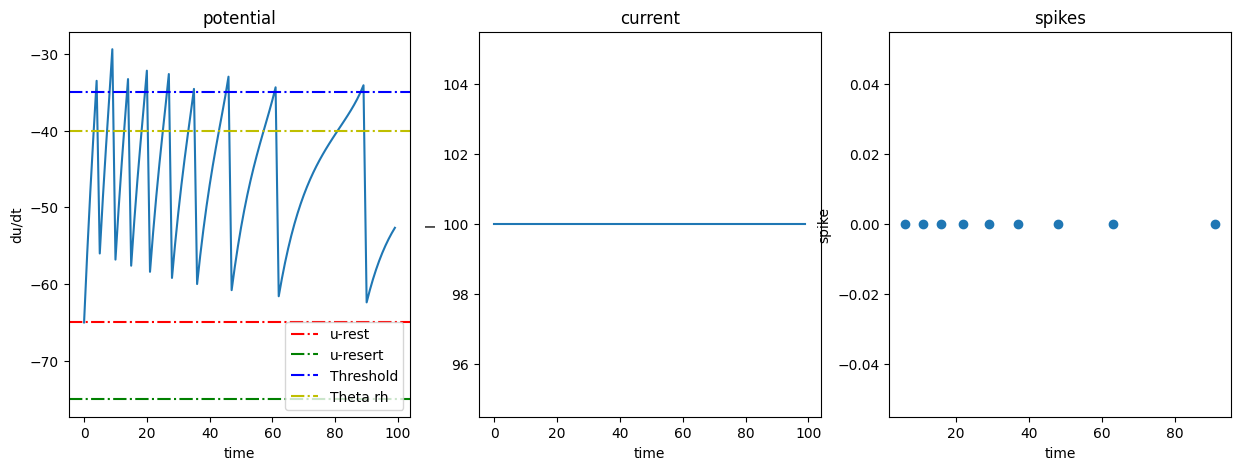

In [11]:
aelif_net = aelif_with_constant_current(i=100, beta=8)
plot_elif_behavior(aelif_net)

StepCurrent

LIF

I = 50, t0 = 50

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:StepCurrent(value=50,t0=50,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 53.874ms


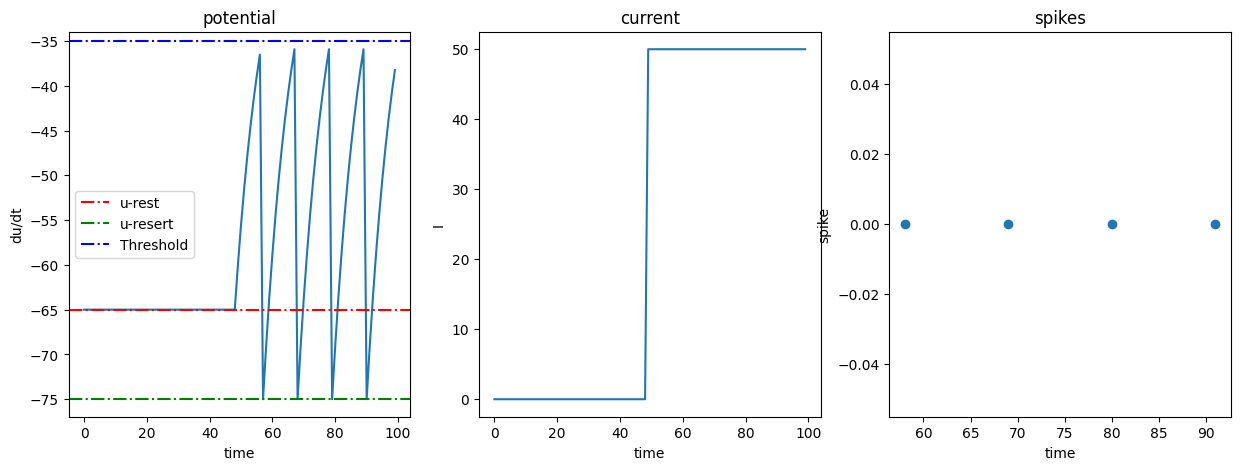

In [17]:
lif_net = lif_with_step_current(i=50, t0=50)
plot_lif_behavior(lif_net)

I = 80, t0 = 20

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:StepCurrent(value=80,t0=20,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 65.505ms


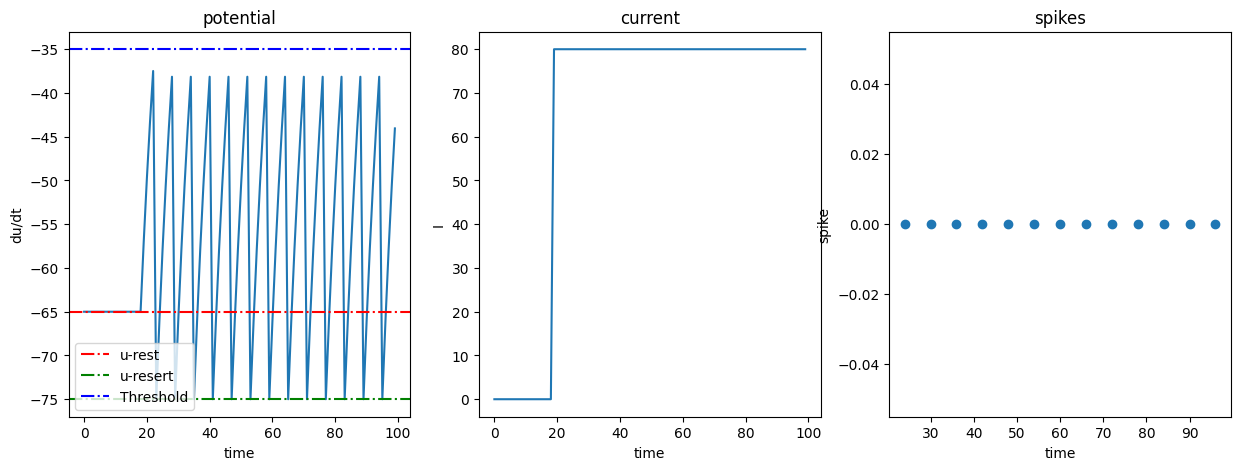

In [19]:
lif_net = lif_with_step_current(i=80, t0=20)
plot_lif_behavior(lif_net)

ELIF

I = 50, t0 = 50

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:StepCurrent(value=50,t0=50,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 82.752ms


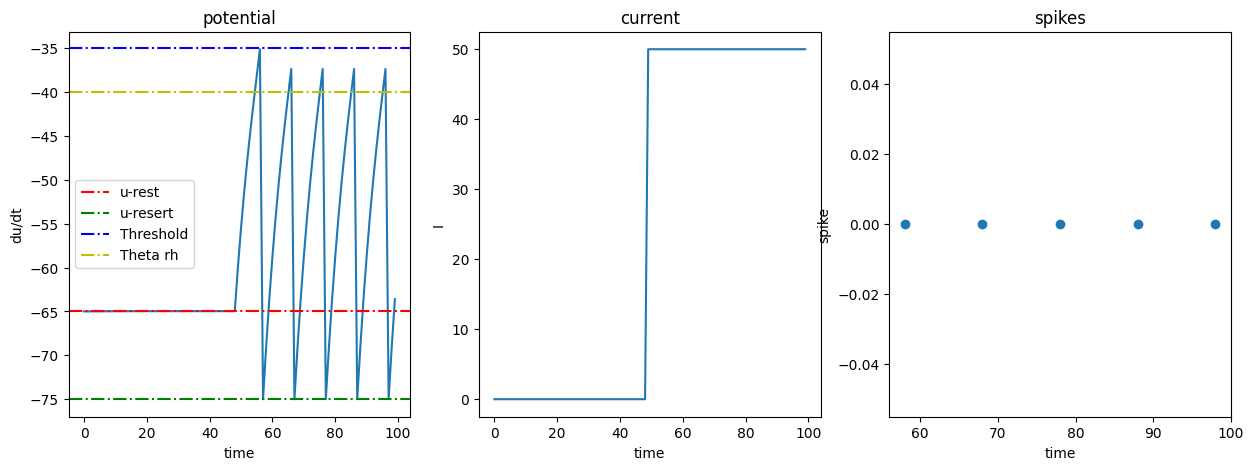

In [25]:
elif_net = elif_with_step_current(i=50, t0=50)
plot_elif_behavior(elif_net)

I = 80, t0 = 20

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:StepCurrent(value=80,t0=20,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 86.399ms


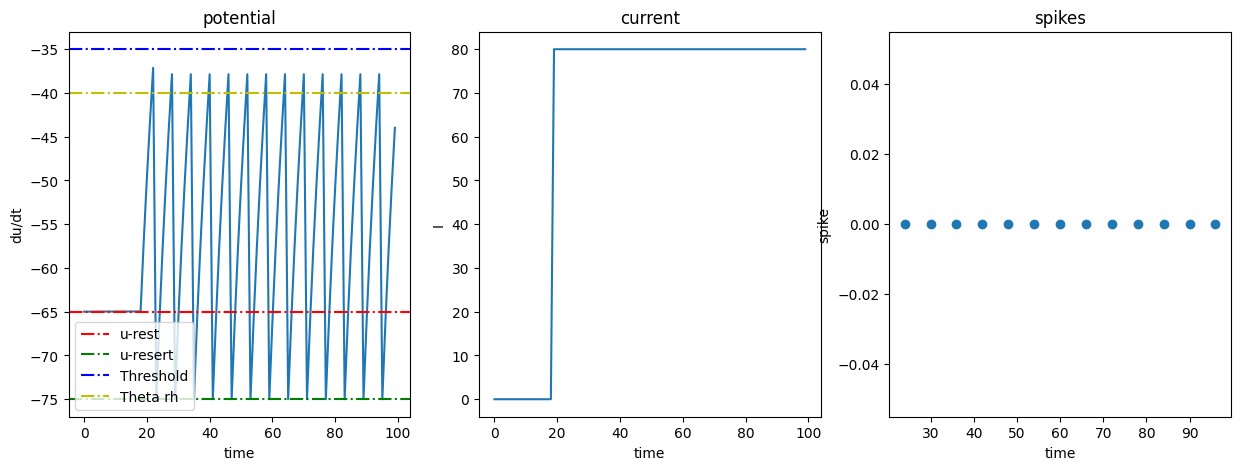

In [26]:
elif_net = elif_with_step_current(i=80, t0=20)
plot_elif_behavior(elif_net)

AELIF

I = 50, t0 = 50

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:StepCurrent(value=50,t0=50,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 89.132ms


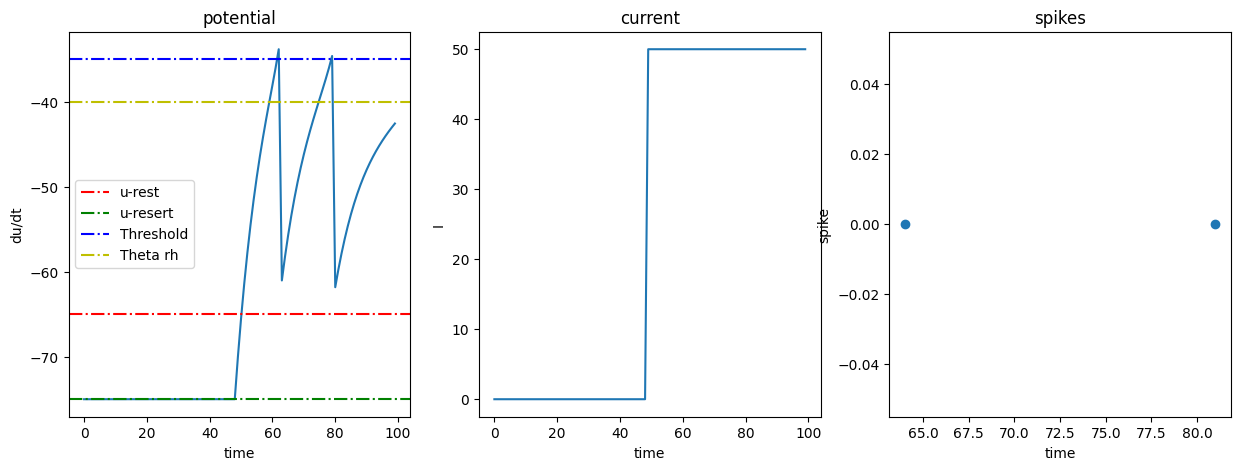

In [34]:
aelif_net = aelif_with_step_current(i=50, t0=50)
plot_elif_behavior(aelif_net)

I = 80, t0 = 20

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:StepCurrent(value=80,t0=20,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 83.719ms


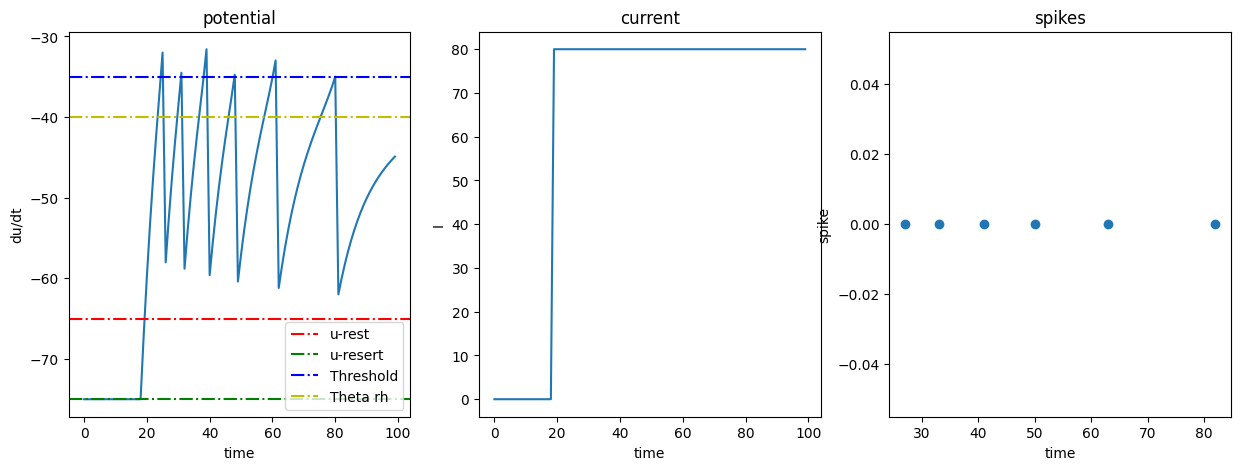

In [35]:
aelif_net = aelif_with_step_current(i=80, t0=20)
plot_elif_behavior(aelif_net)

### StairCase current

LIF

I = 30, interval = 30

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:StaircaseCurrent(value=30,t=30,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 57.341ms


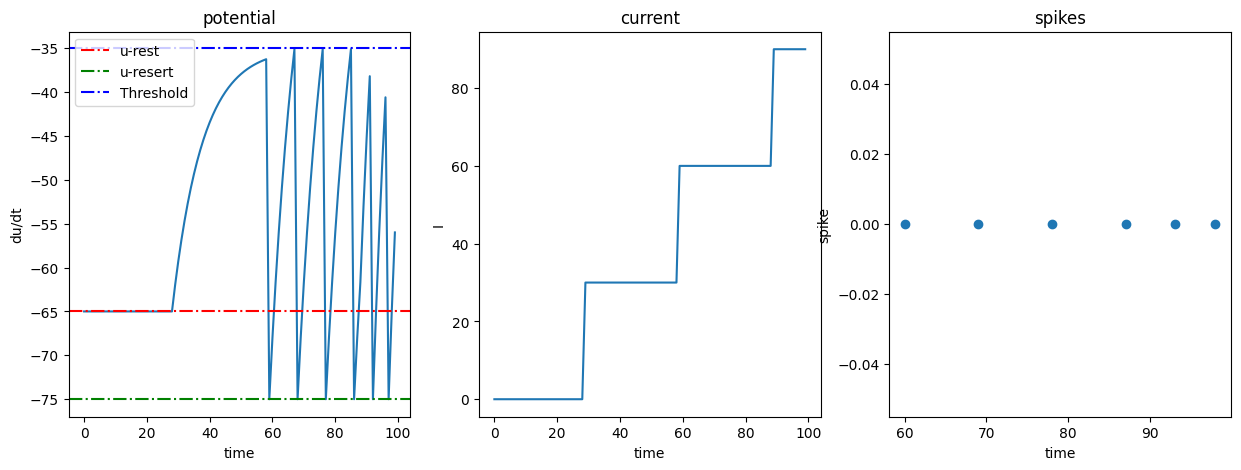

In [38]:
lif_net = lif_with_stair_current(i=30, t=30)
plot_lif_behavior(lif_net)

I = 10, interval = 10

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:StaircaseCurrent(value=10,t=10,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 72.410ms


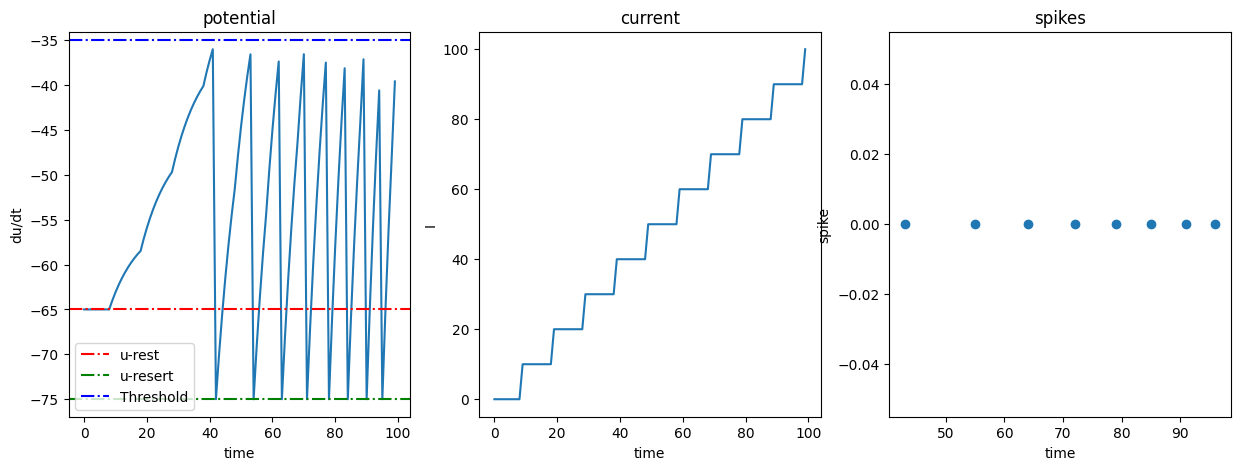

In [40]:
lif_net = lif_with_stair_current(i=10, t=10)
plot_lif_behavior(lif_net)

ELIF

I = 30, interval = 30

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:StaircaseCurrent(value=30,t=30,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 84.589ms


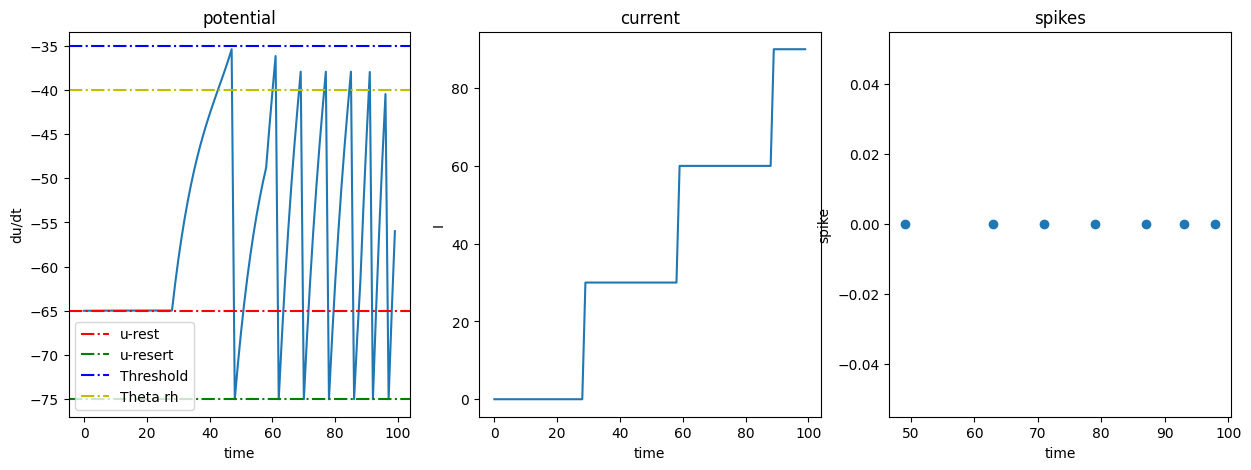

In [42]:
elif_net = elif_with_stair_current(i=30, t=30)
plot_elif_behavior(elif_net)

I = 10, interval = 10

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:StaircaseCurrent(value=10,t=10,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 68.794ms


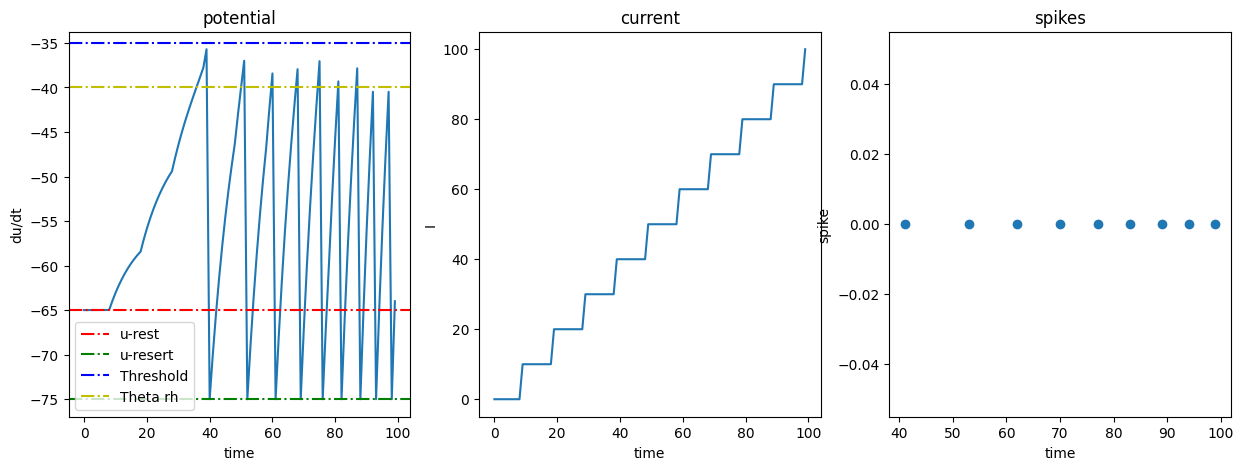

In [43]:
elif_net = elif_with_stair_current(i=10, t=10)
plot_elif_behavior(elif_net)

AELIF

I = 30, interval = 30

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:StaircaseCurrent(value=30,t=30,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 97.544ms


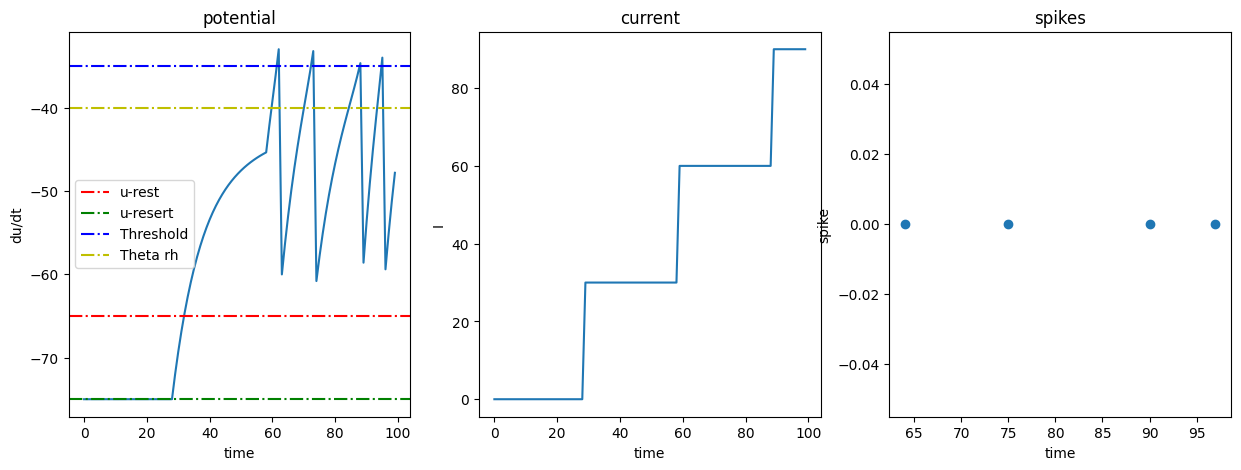

In [45]:
aelif_net = aelif_with_stair_current(i=30, t=30)
plot_elif_behavior(aelif_net)

I = 10, interval = 10

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:StaircaseCurrent(value=10,t=10,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 75.502ms


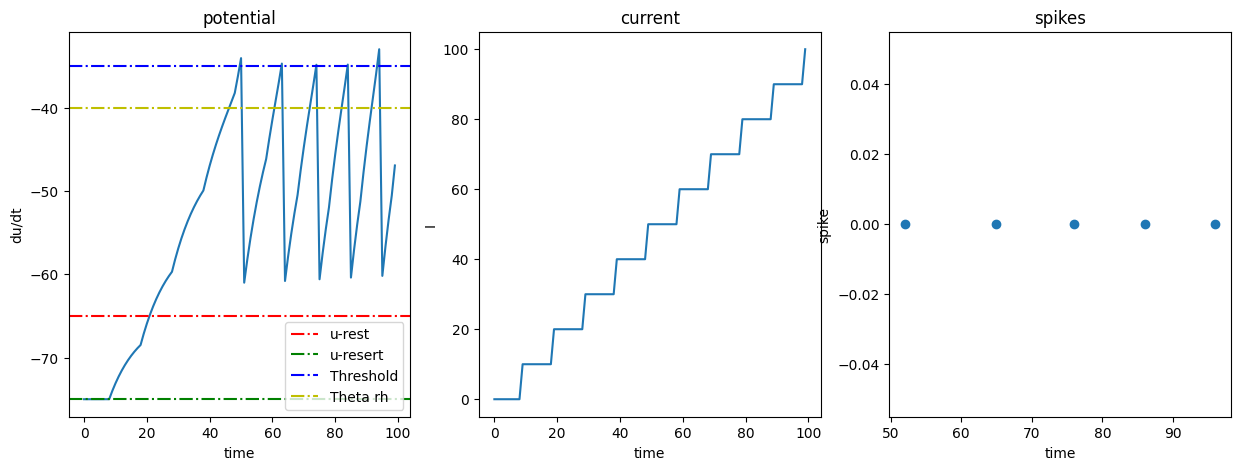

In [46]:
aelif_net = aelif_with_stair_current(i=10, t=10)
plot_elif_behavior(aelif_net)

### Sinusoidal current

LIF

amplitude = 20, frequency = 0.1

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=20,frequency=0.1,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 136.315ms


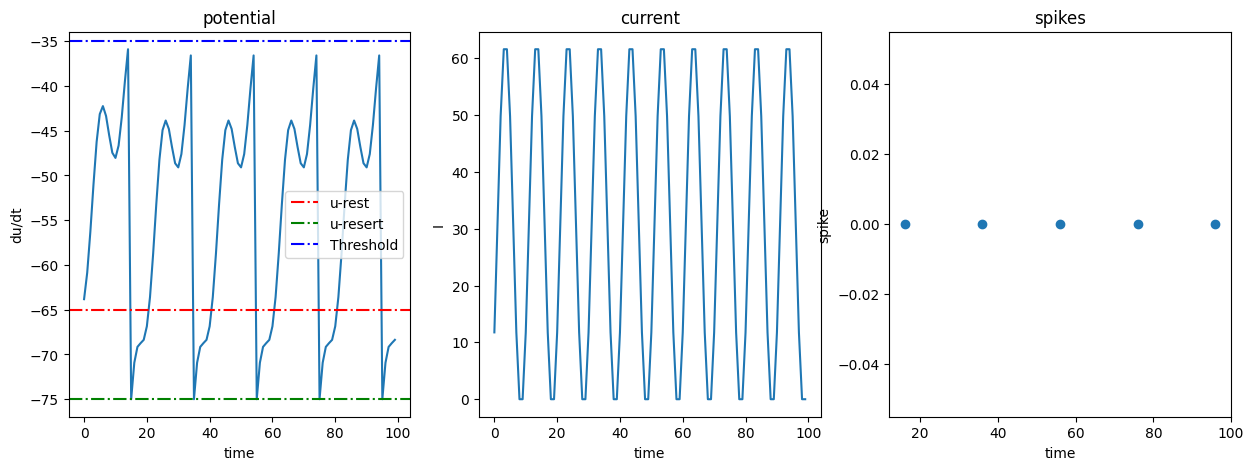

In [9]:
lif_net = lif_with_sin_current(amplitude=20, frequency=0.1)
plot_lif_behavior(lif_net)

amplitude = 20, frequency = 0.05

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=20,frequency=0.05,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 222.332ms


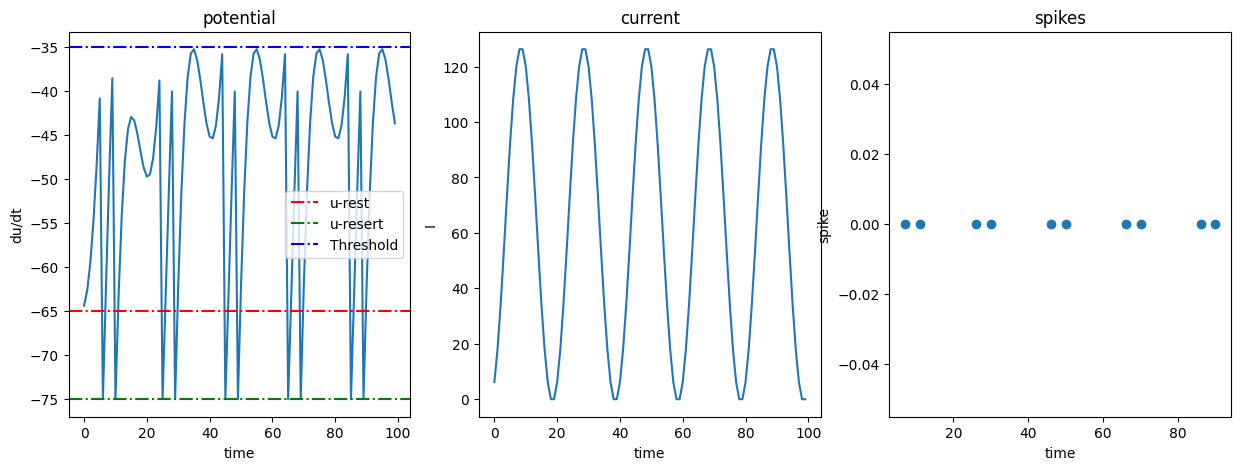

In [10]:
lif_net = lif_with_sin_current(amplitude=20, frequency=0.05)
plot_lif_behavior(lif_net)

amplitude = 40, frequency = 0.05

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=40,frequency=0.05,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 139.861ms


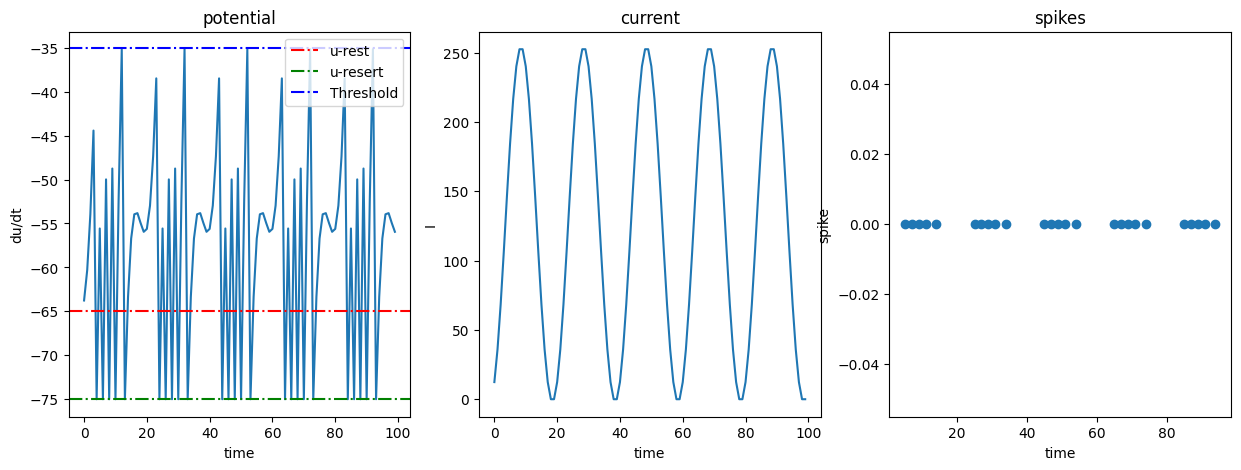

In [11]:
lif_net = lif_with_sin_current(amplitude=40, frequency=0.05)
plot_lif_behavior(lif_net)

ELIF

amplitude = 20, frequency = 0.1

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=20,frequency=0.1,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 202.866ms


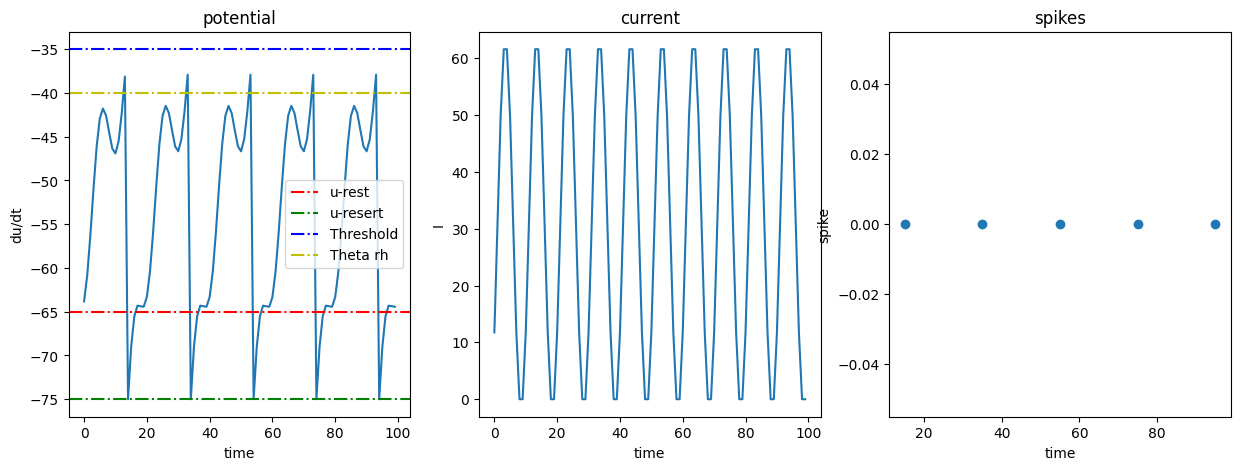

In [15]:
elif_net = elif_with_sin_current(amplitude=20, frequency=0.1)
plot_elif_behavior(elif_net)

amplitude = 20, frequency = 0.05

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=20,frequency=0.05,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 162.491ms


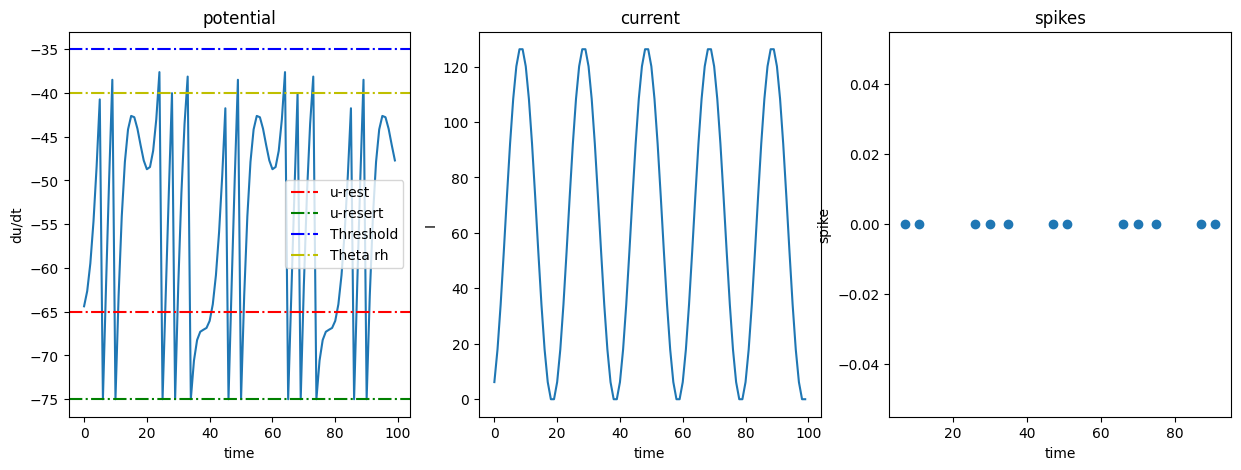

In [16]:
elif_net = elif_with_sin_current(amplitude=20, frequency=0.05)
plot_elif_behavior(elif_net)

amplitude = 40, frequency = 0.05

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=40,frequency=0.05,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 237.722ms


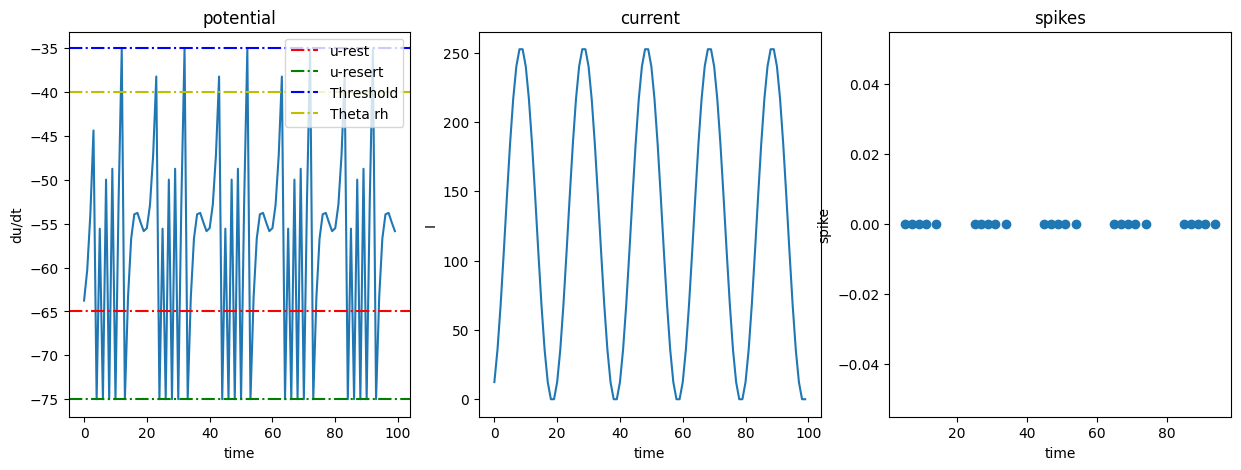

In [17]:
elif_net = elif_with_sin_current(amplitude=40, frequency=0.05)
plot_elif_behavior(elif_net)

AELIF

amplitude = 20, frequency = 0.1

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=20,frequency=0.1,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 258.721ms


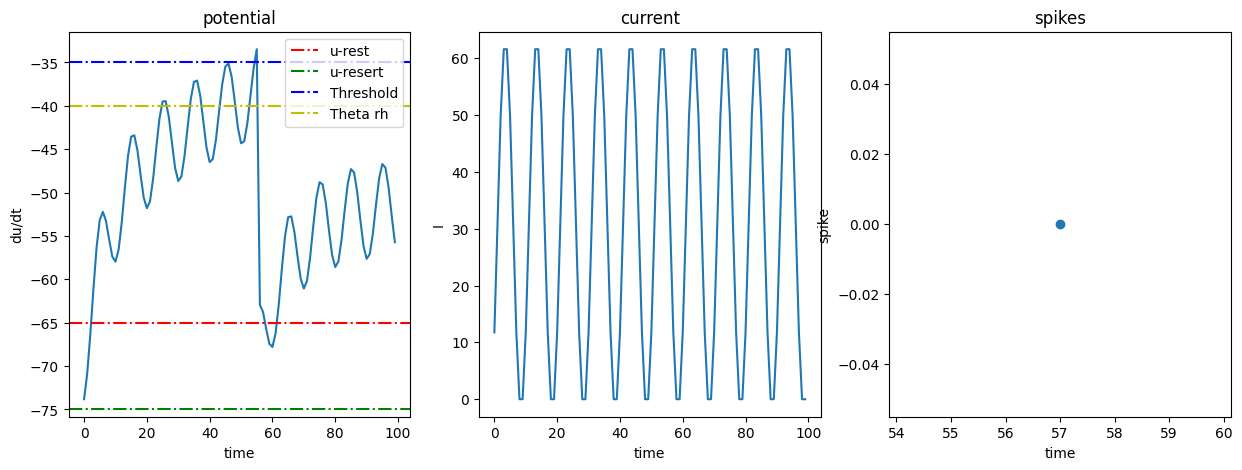

In [18]:
aelif_net = aelif_with_sin_current(amplitude=20, frequency=0.1)
plot_elif_behavior(aelif_net)

amplitude = 20, frequency = 0.05

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=20,frequency=0.05,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 157.419ms


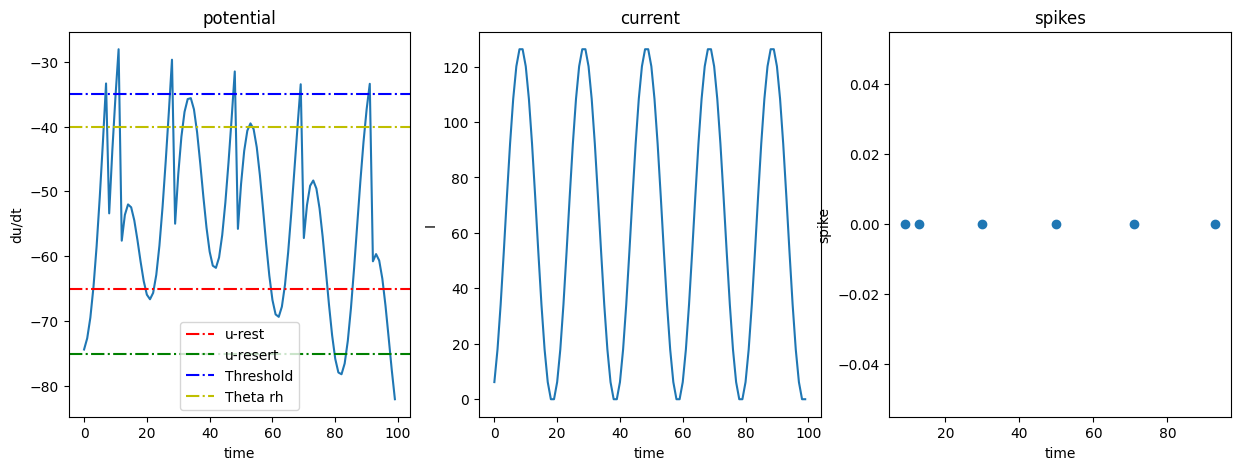

In [19]:
aelif_net = aelif_with_sin_current(amplitude=20, frequency=0.05)
plot_elif_behavior(aelif_net)

amplitude = 40, frequency = 0.05

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:SinCurrent(amplitude=40,frequency=0.05,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 191.345ms


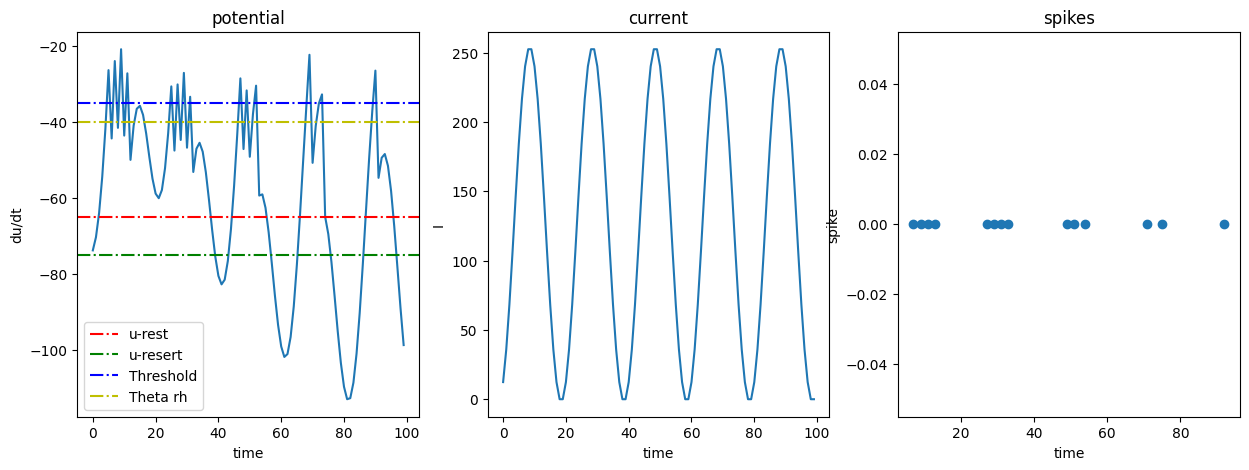

In [20]:
aelif_net = aelif_with_sin_current(amplitude=40, frequency=0.05)
plot_elif_behavior(aelif_net)

### Noisy Current

LIF

sinusoidal noise

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=10,frequency=0.03,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 251.657ms


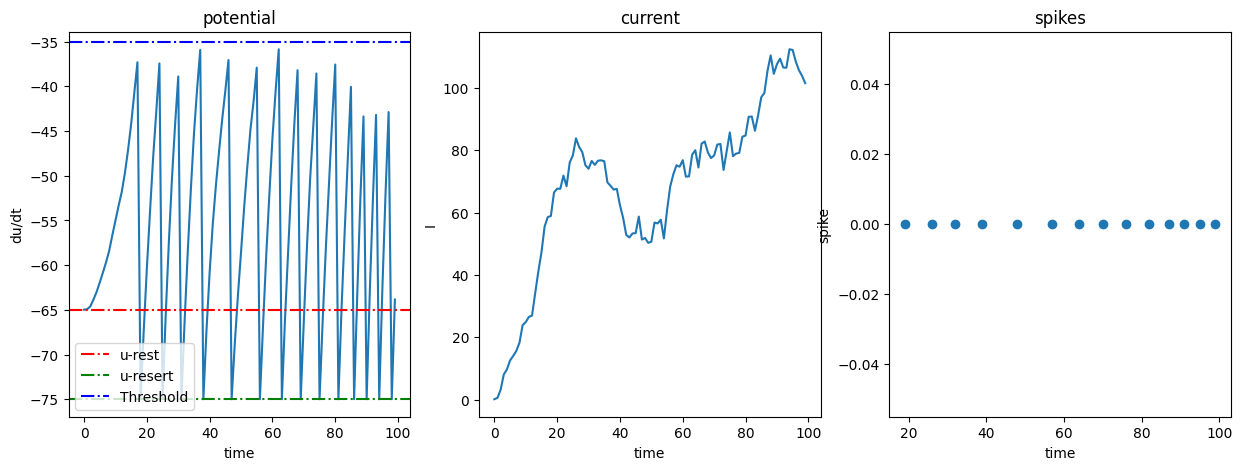

In [31]:
lif_net = lif_with_sinnoise_current(amplitude=10, frequency=0.03)
plot_lif_behavior(lif_net)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=10,frequency=0.05,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 187.479ms


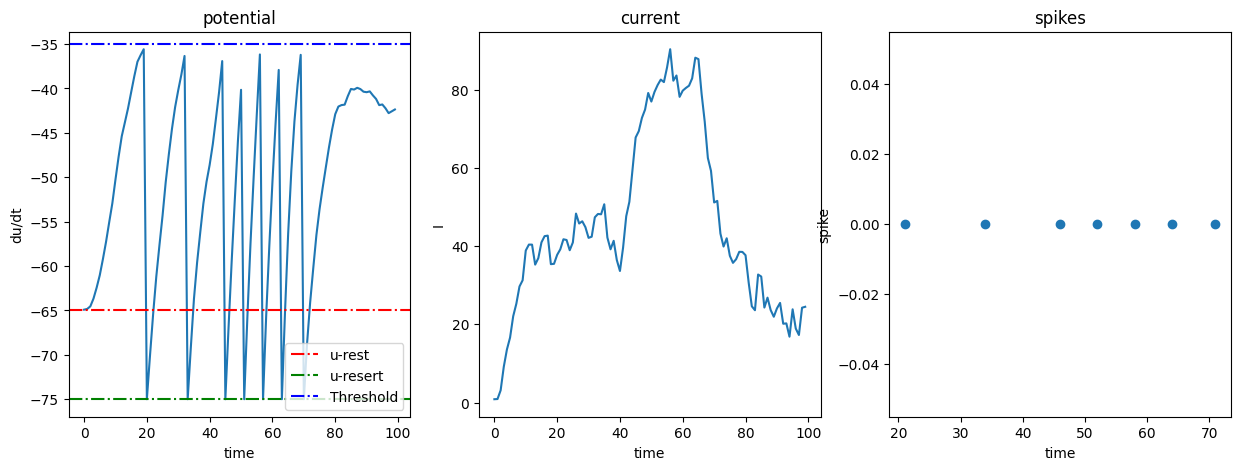

In [44]:
lif_net = lif_with_sinnoise_current(amplitude=10, frequency=0.05)
plot_lif_behavior(lif_net)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['lif_ng1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=30,frequency=0.1,)3:LIF(tau=10,u_rest=-65,u_reset=-75,threshold=-35,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_rec, lif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=lif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 45.407ms


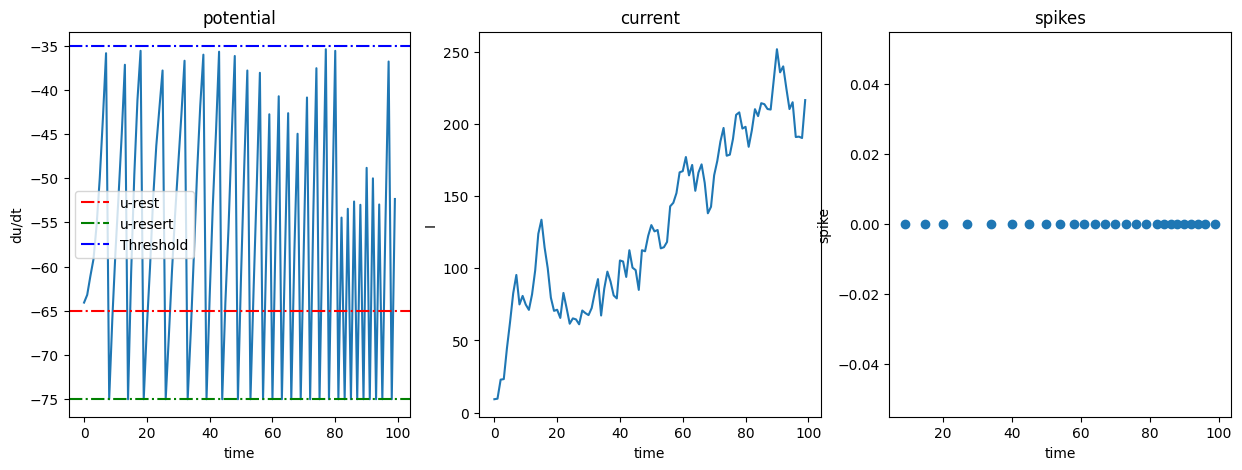

In [55]:
lif_net = lif_with_sinnoise_current(amplitude=30, frequency=0.1)
plot_lif_behavior(lif_net)

ELIF

sinusoidal noise

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=10,frequency=0.03,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}


100xBatch: 1/1 (100%) 244.912ms


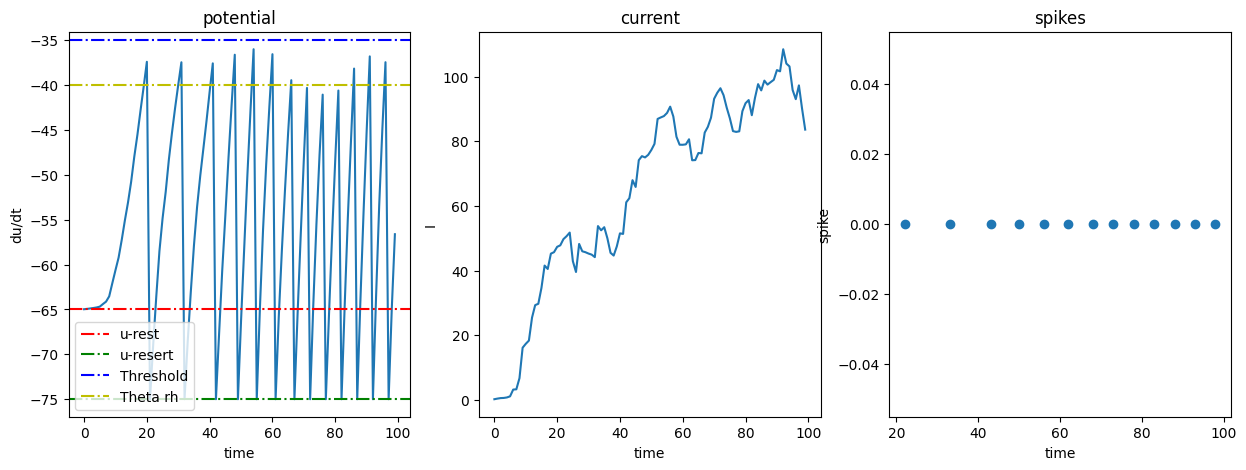

In [34]:
elif_net = elif_with_sinnoise_current(amplitude=10, frequency=0.03)
plot_elif_behavior(elif_net)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=10,frequency=0.05,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 90.651ms


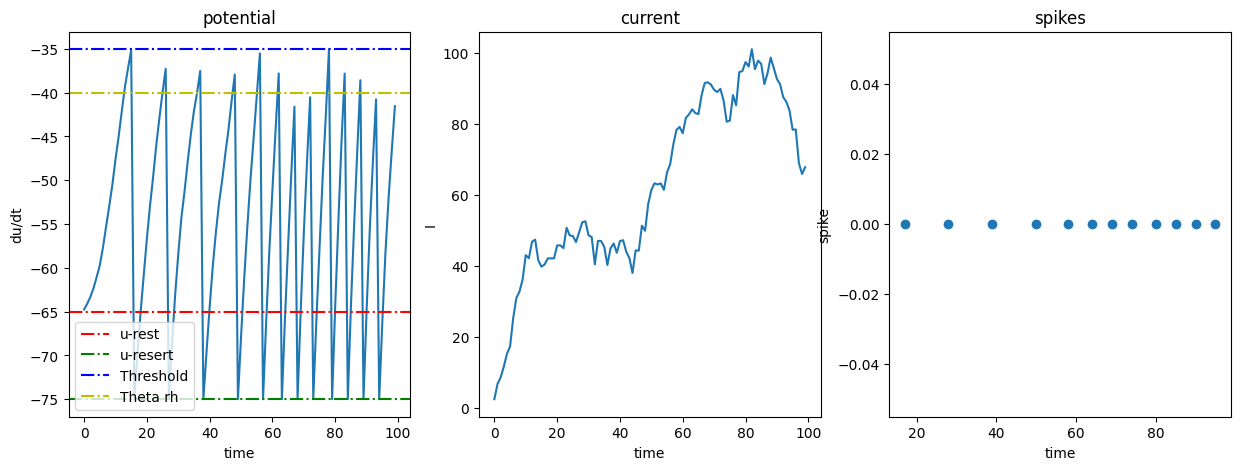

In [46]:
elif_net = elif_with_sinnoise_current(amplitude=10, frequency=0.05)
plot_elif_behavior(elif_net)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['elif_ng1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=30,frequency=0.1,)3:ELIF(tau=10,u_rest=-65,u_reset=-75,theta_rh=-40,threshold=-35,delta_t=5,R=1,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_rec, elif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=elif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 70.336ms


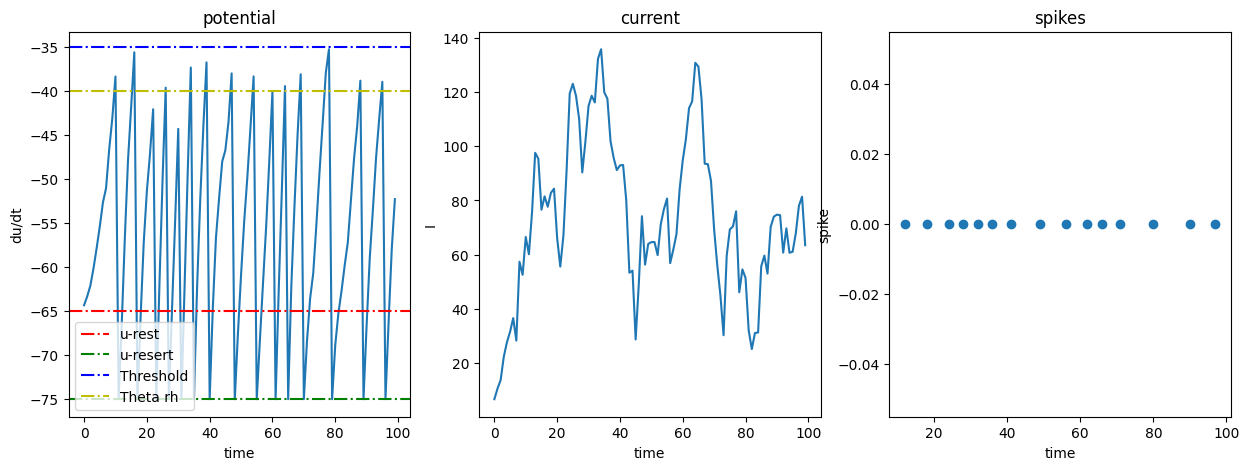

In [56]:
elif_net = elif_with_sinnoise_current(amplitude=30, frequency=0.1)
plot_elif_behavior(elif_net)

AELIF

sinusoidal noise

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=10,frequency=0.03,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}


100xBatch: 1/1 (100%) 313.348ms


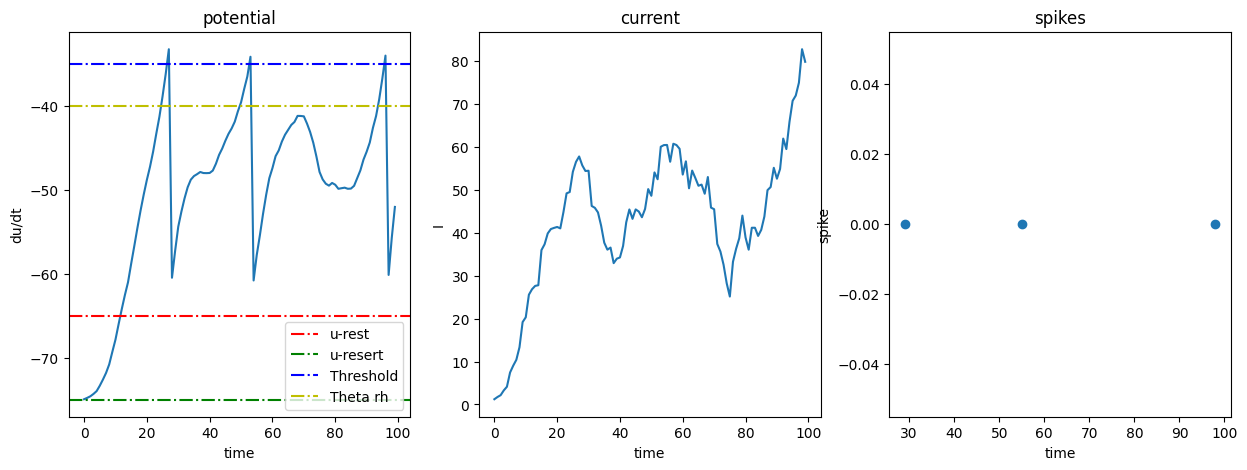

In [37]:
aelif_net = aelif_with_sinnoise_current(amplitude=10, frequency=0.03)
plot_elif_behavior(aelif_net)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=10,frequency=0.05,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 110.081ms


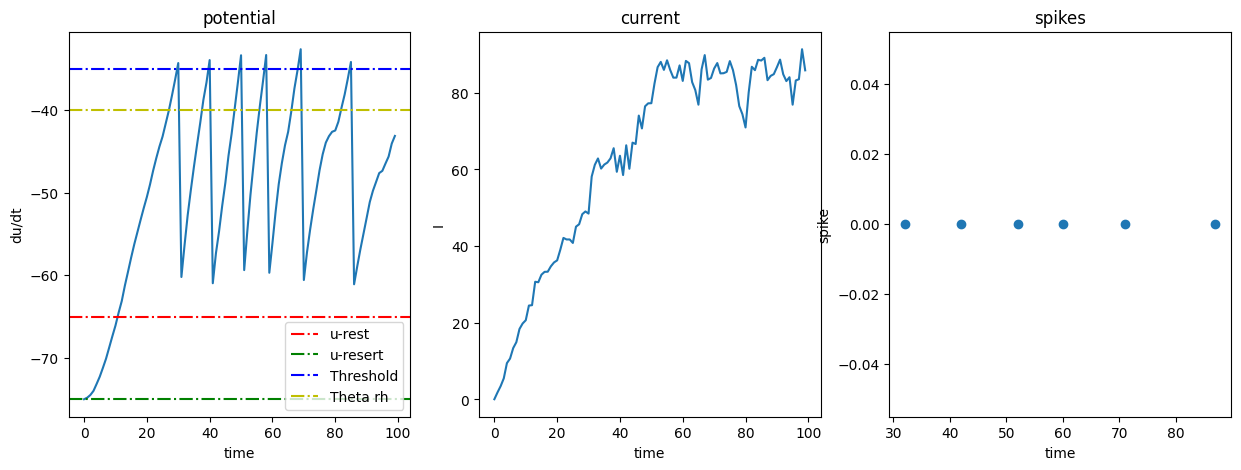

In [47]:
aelif_net = aelif_with_sinnoise_current(amplitude=10, frequency=0.05)
plot_elif_behavior(aelif_net)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution()}
NeuronGroup['AELIF_NG1', 'NeuronGroup', 'ng'](1){2:NoisyCurrent(amplitude=30,frequency=0.1,)3:AELIF(tau_m=10,tau_w=200,u_rest=-75,u_reset=-65,theta_rh=-40,threshold=-35,delta_t=5,R=1,alpha=1,beta=8,)4:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_rec, aelif_ng1_recorder,)5:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=aelif_ng1_evrec,arg_0=spike,)}
100xBatch: 1/1 (100%) 106.647ms


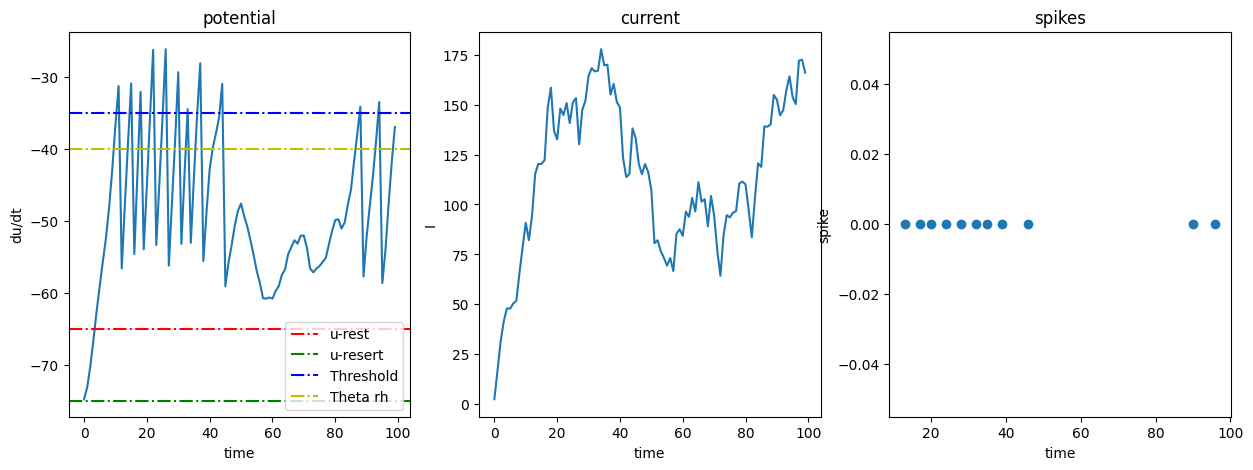

In [57]:
aelif_net = aelif_with_sinnoise_current(amplitude=30, frequency=0.1)
plot_elif_behavior(aelif_net)

### F-I curve 

LIF

In [ ]:
frequencies_lif = []
frequencies_elif = []
frequencies_aelif = []
for i in range(0, 160):
    frequency = lif_frequency_recorder(i)
    frequencies_lif.append(frequency)

    frequency = elif_frequency_recorder(i)
    frequencies_elif.append(frequency)

    frequency = aelif_frequency_recorder(i)
    frequencies_aelif.append(frequency)

f_lif = []
f_elif = []
f_aelif = []
for i in range(0, len(frequencies_lif) - 3, 4):
    chunk_sum = (frequencies_lif[i]+frequencies_lif[i+1]+frequencies_lif[i+2]+frequencies_lif[i+3]) / 4
    f_lif.append(chunk_sum)
    chunk_sum = (frequencies_elif[i]+frequencies_elif[i+1]+frequencies_elif[i+2]+frequencies_elif[i+3]) / 4
    f_elif.append(chunk_sum)
    chunk_sum = (frequencies_aelif[i]+frequencies_aelif[i+1]+frequencies_aelif[i+2]+frequencies_aelif[i+3]) / 4
    f_aelif.append(chunk_sum)

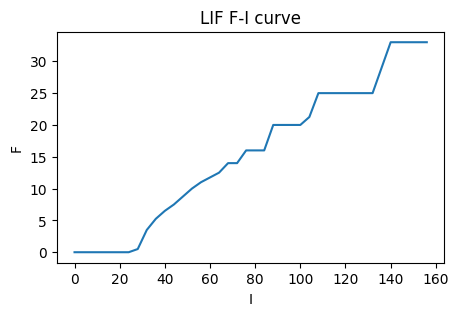

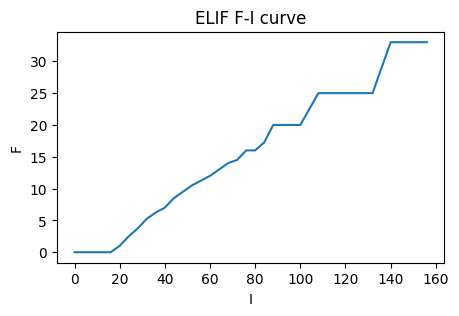

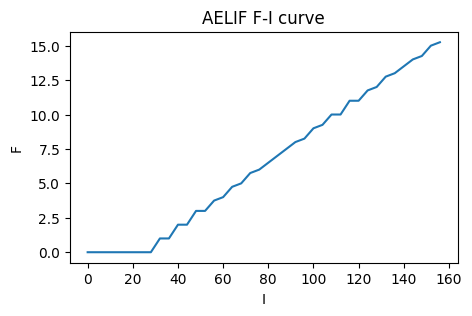

In [12]:
F_I_curve_plot(f_lif, 160, "LIF")
F_I_curve_plot(f_elif, 160, "ELIF")
F_I_curve_plot(f_aelif, 160, "AELIF")

ELIF